In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

### Filtriranje v frekfenčnem prostoru
**filter razdeli signal na zanimi**

freq1 in freq2 nista celoštevilska večkratnika frekfenčnega diskretnega koraga (1/T) zato bomo dobili **spektralno razlivanje**

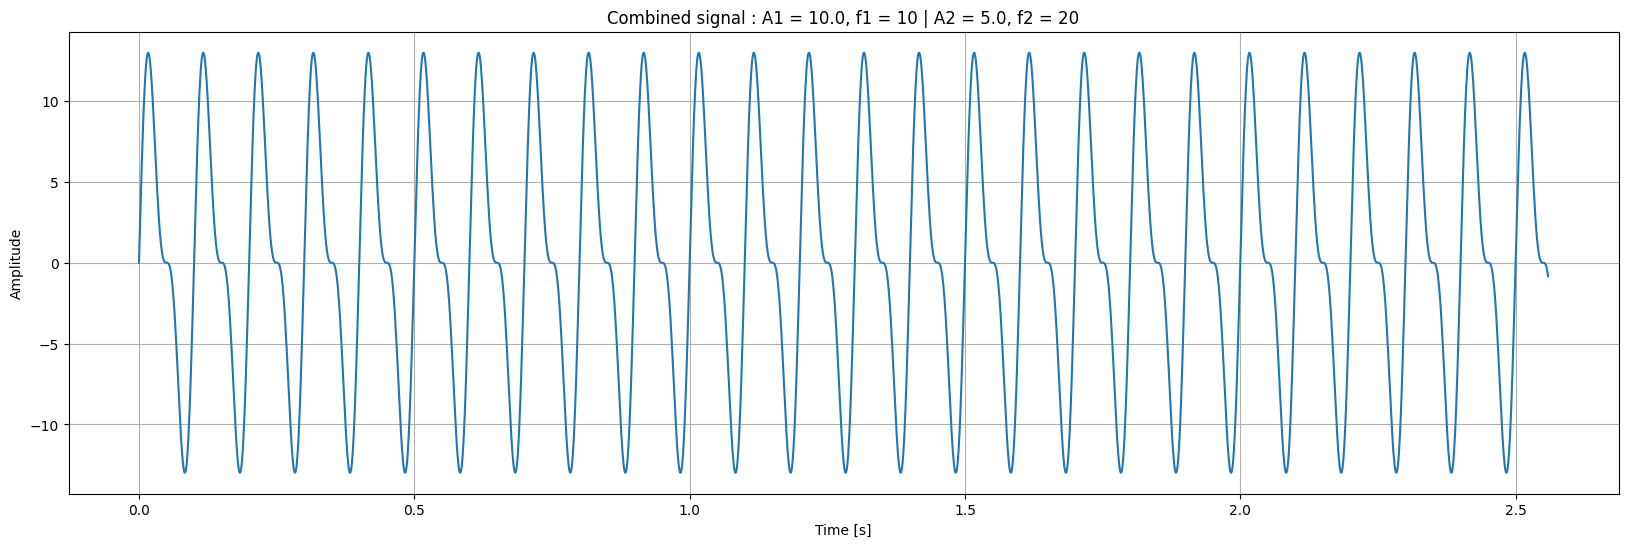

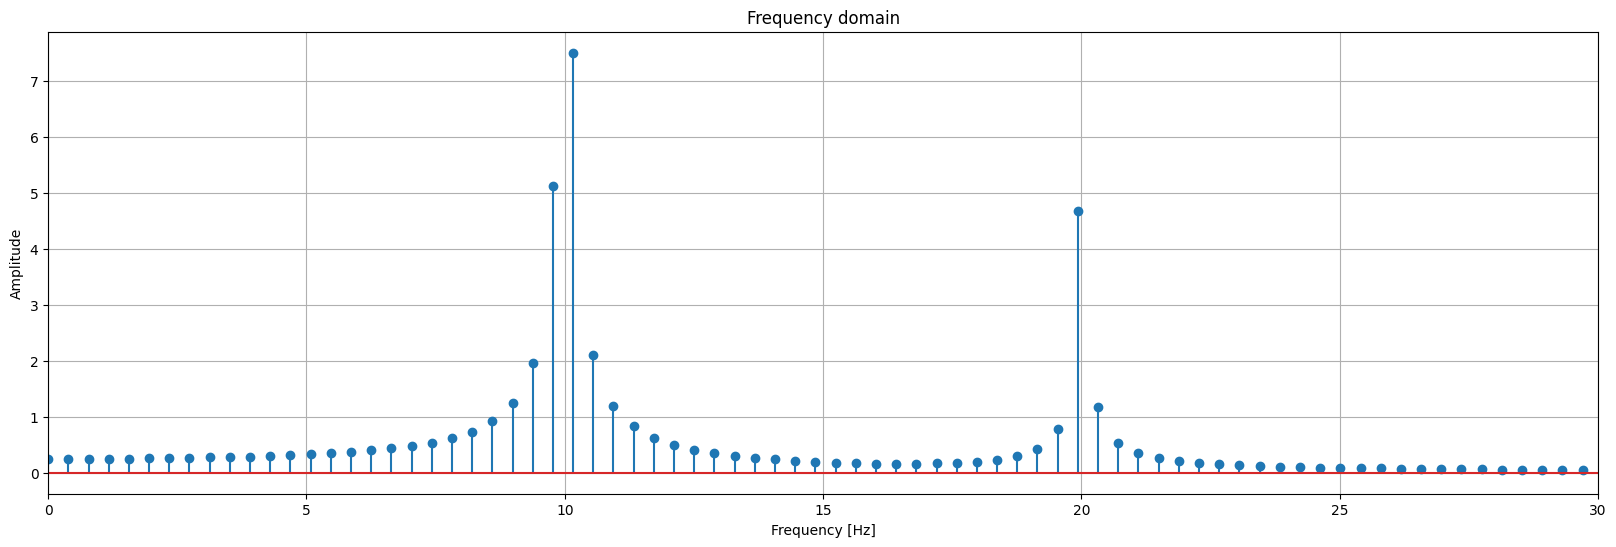

In [3]:
Fs = 1000
T = 2.56
t = np.arange(0, T, 1/Fs)

freq1 = 10
freq2 = 20

A1 = 10.0
A2 = 5.0

y1 = A1 * np.sin(2 * np.pi * t * freq1)
y2 = A2 * np.sin(2 * np.pi * t * freq2)

y = y1 + y2
N = len(y)

plt.figure(figsize=(20, 6))
plt.plot(t, y)
plt.grid(True)
plt.title(f"Combined signal : A1 = {A1}, f1 = {freq1} | A2 = {A2}, f2 = {freq2}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

ys = np.fft.fft(y)[:N//2]
freq = np.linspace(0, Fs, N)[:N//2]

plt.figure(figsize=(20, 6))
plt.stem(freq, (2 * np.abs(ys)) / N)
plt.grid(True)
plt.title("Frequency domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.xlim(0, 30)
plt.show()



### Vrste filtrov glede na karaketristiko
- **low-pass** filter
- **high-pass** filter
- **band-pass** filter
- **band-stop** filter

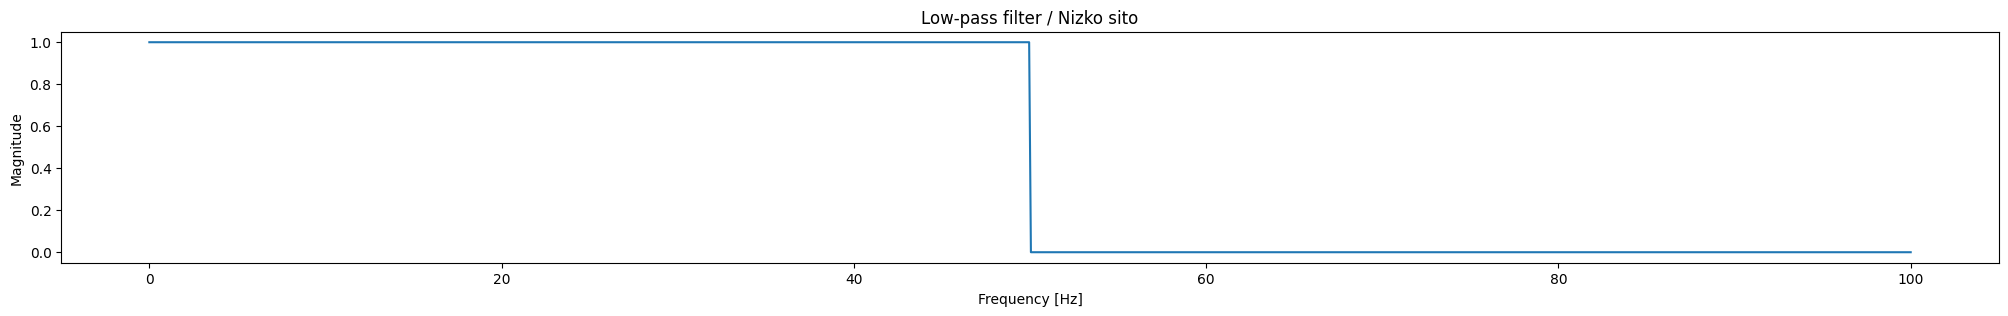

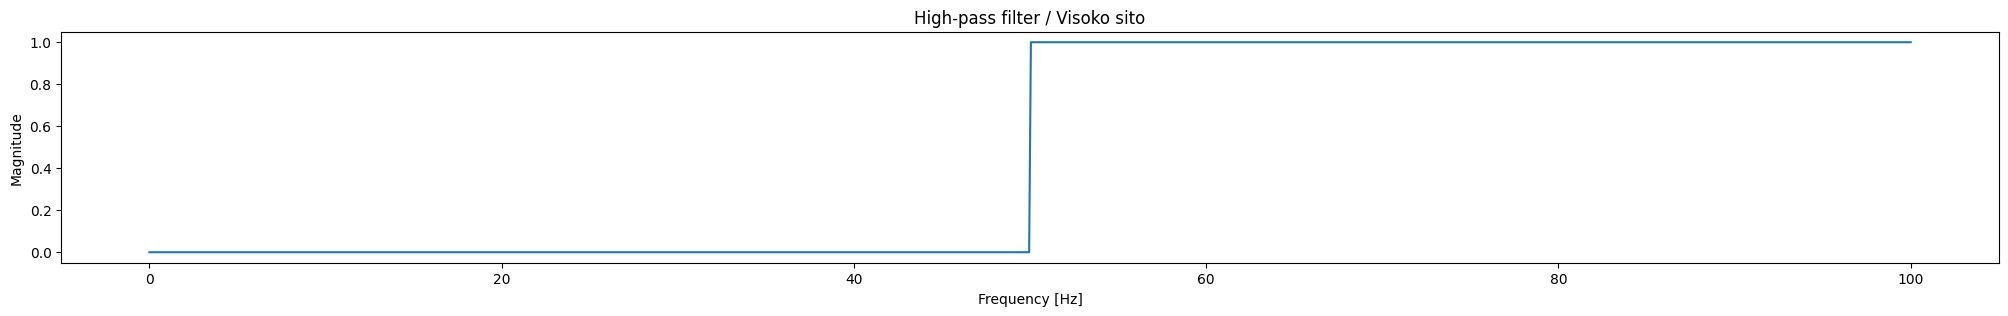

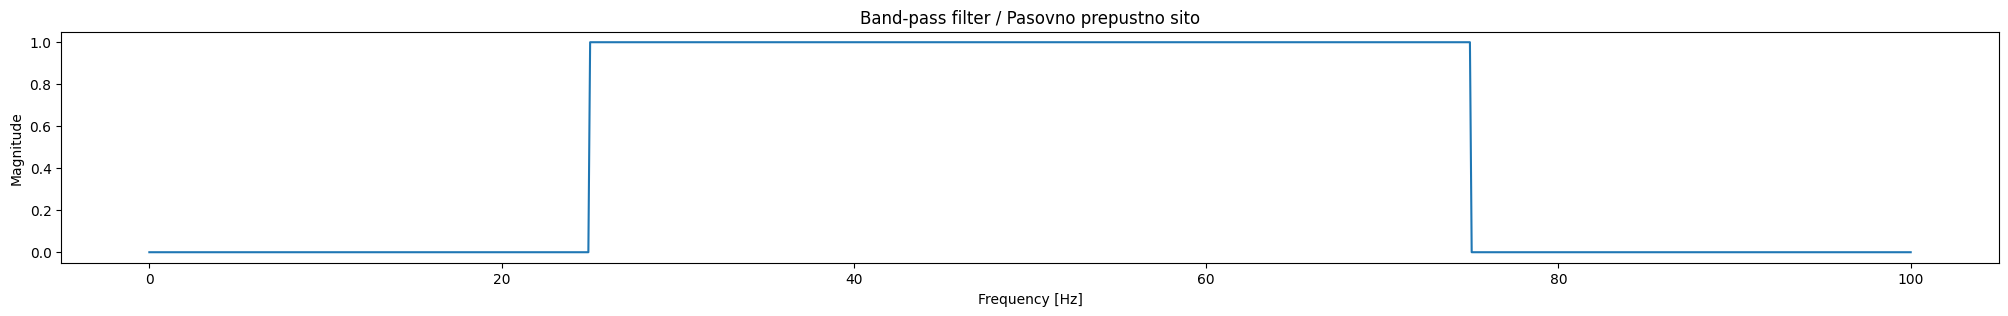

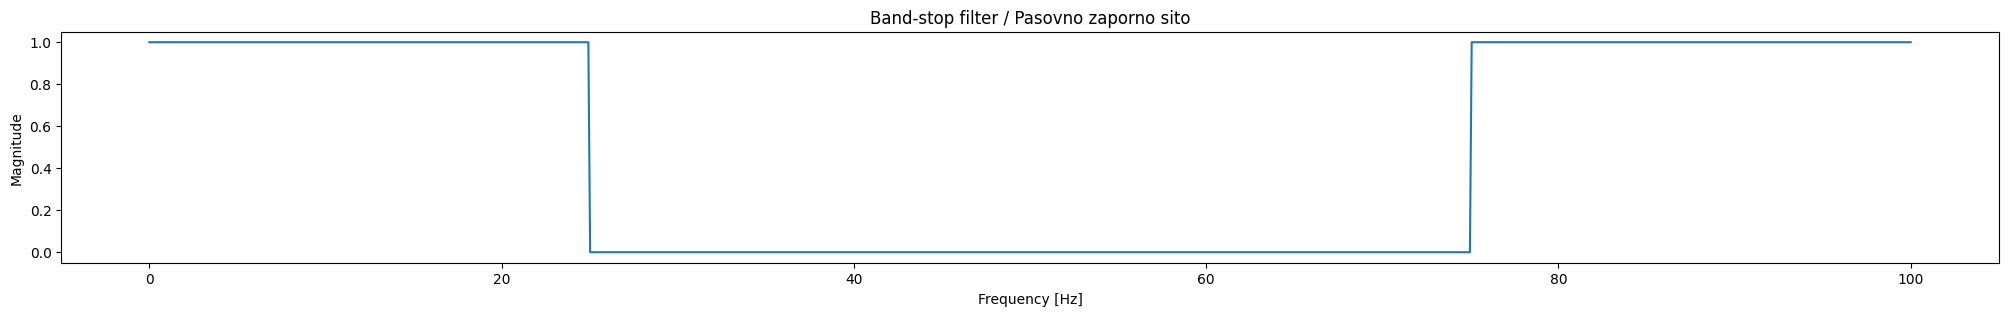

In [4]:
f = np.linspace(0, 100, 1000)

plt.figure(figsize=(25, 3))
plt.plot(f, np.where(f <= 50, 1, 0))
plt.title("Low-pass filter / Nizko sito")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

plt.figure(figsize=(25, 3))
plt.plot(f, np.where(f >= 50, 1, 0))
plt.title("High-pass filter / Visoko sito")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

plt.figure(figsize=(25, 3))
plt.plot(f, np.where((f >= 25) & (f <= 75), 1, 0))
plt.title("Band-pass filter / Pasovno prepustno sito")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

plt.figure(figsize=(25, 3))
plt.plot(f, np.where((f >= 25) & (f <= 75), 0, 1))
plt.title("Band-stop filter / Pasovno zaporno sito")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

### Načrtovanje filtrov - FIR ali IIR
Če v filter pošljem vhodni vektor [1, 0, 0, ...., 0] bo rezultat **Impulzni odziv/Impulse response** filtra
## FIR - Finite Impulse Response
- Impluzlni odziv ima končno trajanje in je na koncu vedno 0 (stabilni filter)
- Idelani filter ne spremeni frekfenčne komponente
- Idealni FIR nemogoče načrtovati, saj bi ta bil neskončno dolg
- Približevanje neskočnemu filtru uvede valovitost v prepustne in zapornem pasu
    - Valovitost je nezaželena ampak neizogibna

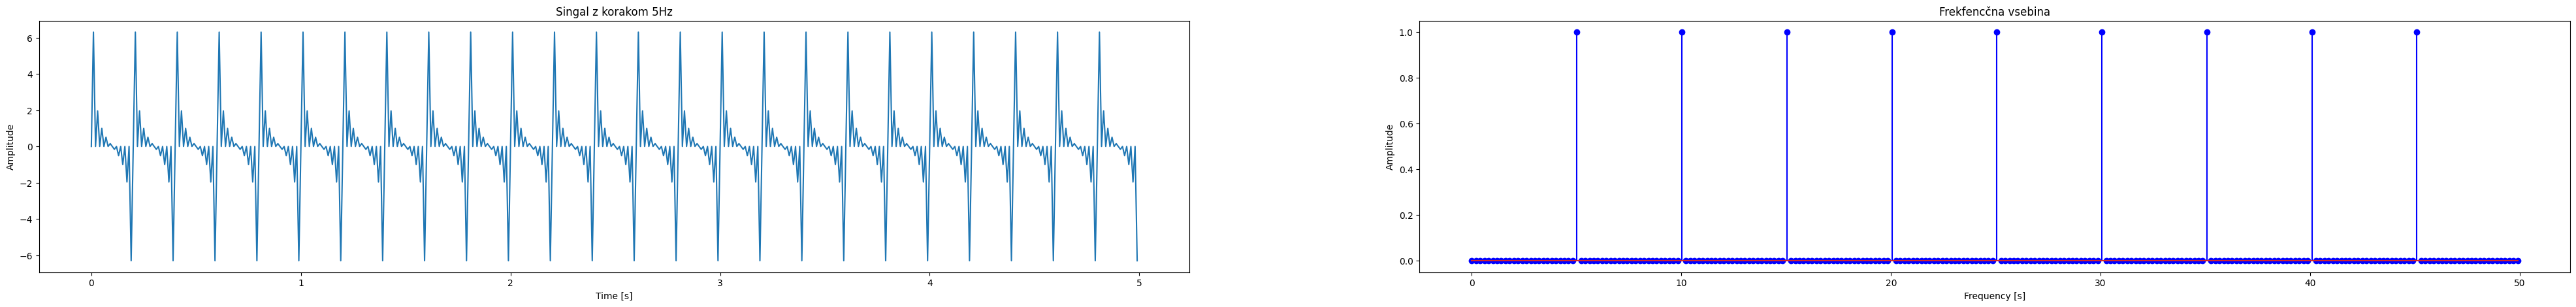

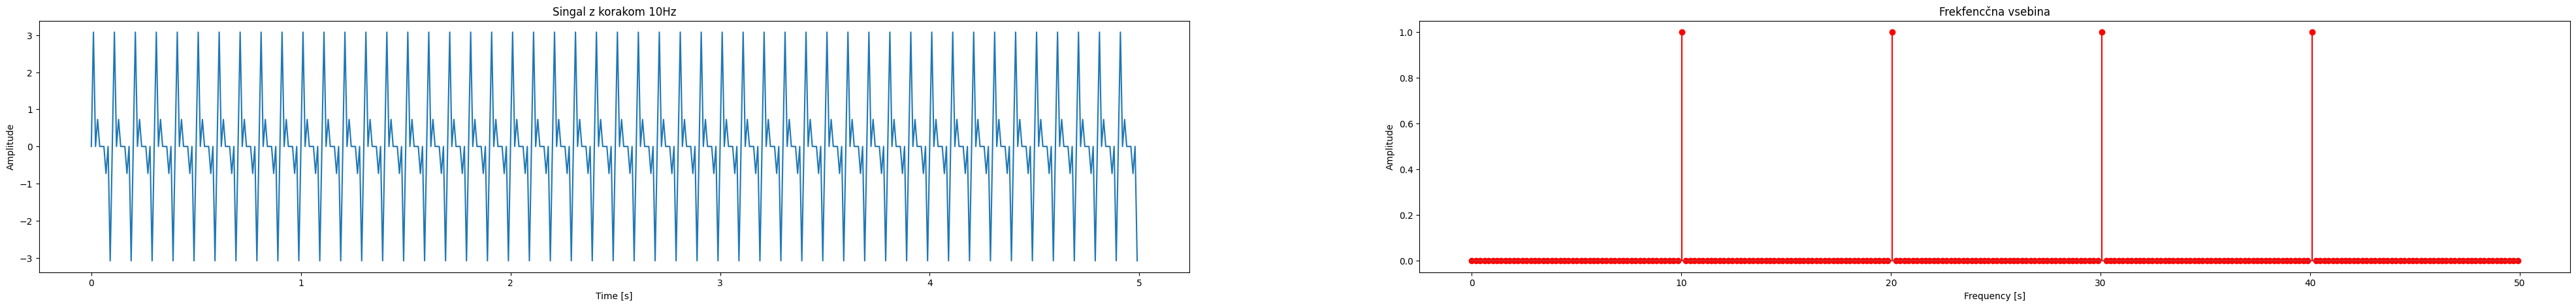

In [5]:
Fs = 100
T = 5
t = np.arange(0, T, 1/Fs)
A1 = 1.0
p = 0
N = int(T * Fs)
freq = np.linspace(0, Fs, N)[:N//2]

# Signal z koraki 5Hz
y5 = np.zeros(N)
for f in np.arange(5, 50, 5):
    y5 += A1 * np.sin(2*np.pi*t*f + p)

Y5 = np.fft.fft(y5)[:N//2]
ampl5 = 2 * np.abs(Y5)


y10 = np.zeros(N)
for f in np.arange(10, 50, 10):
    y10 += A1 * np.sin(2*np.pi*t*f + p)

Y10 = np.fft.fft(y10)[:N//2]
ampl10 = 2 * np.abs(Y10)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(50, 5))
axs[0].plot(t, y5)
axs[0].set_title("Singal z korakom 5Hz")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")

axs[1].stem(freq, ampl5/N, 'b')
axs[1].set_title('Frekfencčna vsebina')
axs[1].set_xlabel('Frequency [s]')
axs[1].set_ylabel('Amplitude')
plt.show()


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(50, 5))
axs[0].plot(t, y10)
axs[0].set_title("Singal z korakom 10Hz")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")

axs[1].stem(freq, ampl10/N, 'r')
axs[1].set_title('Frekfencčna vsebina')
axs[1].set_xlabel('Frequency [s]')
axs[1].set_ylabel('Amplitude')
plt.show()


Iz signala s korakom 5Hz želimo odstaniit vmesne frekfence, tako da bo rezulatat neak signalu s korakom 5Hz

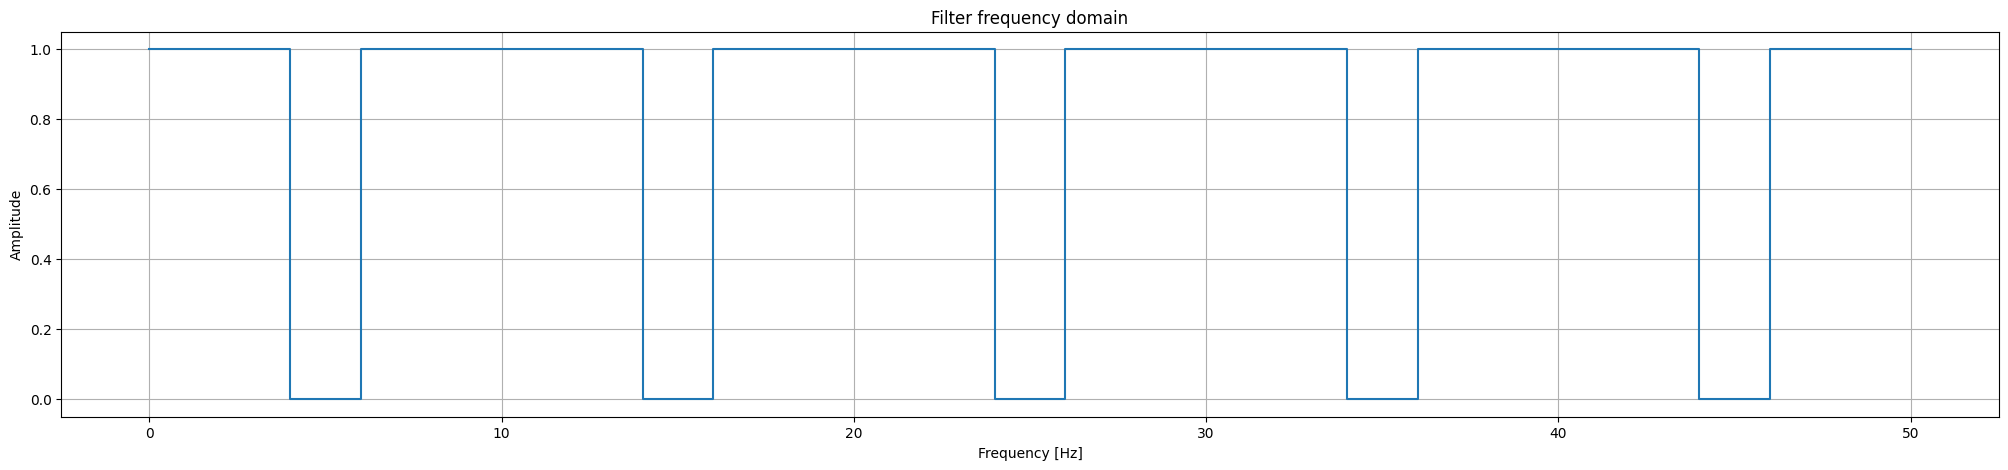

In [6]:
# Create filter
fc = np.array([0]) # Freqeuny cutoff
am = np.array([1])

for f in range(5, 50, 10):
    # Create freqency banc for example (4,6) = 0 & (,4] U [6, ) = 1
    # (passband_end, stopband_start, stopband_end, passband_start)
    fc = np.concatenate((fc, [(f-1)/(Fs/2), (f-1)/(Fs/2), (f+1)/(Fs/2), (f+1)/(Fs/2)]))
    am = np.concatenate((am, [1, 0, 0, 1]))

fc = np.concatenate((fc, [1]))
am = np.concatenate((am, [1]))

plt.figure(figsize=(25, 5))
plt.plot(fc * (Fs/2), am)
plt.title(f"Filter frequency domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Načrotvanje FIR (Finate Impulse Respnse) filtra s pomočjo metode najmanjših kvadratičnih pogreškov

Opazujmo, kas se dogaja ko spreminjamo red filtra "fo" --> filter order

Z veačnjem read filtra / dolzina filtra se bližamo obliki idealnega filtra. Idelane oblike s FIR nemoremo doseči saj bi zato potrebovali filter dolžine/reda neskončno

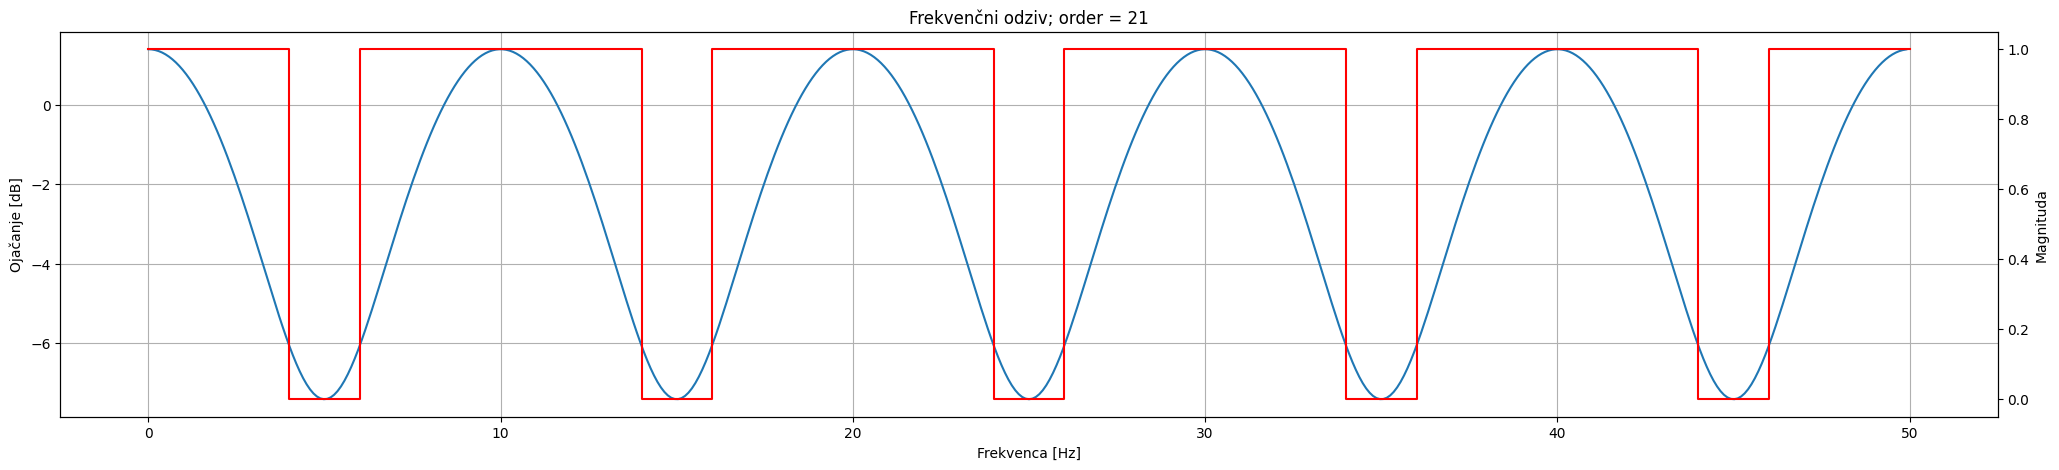

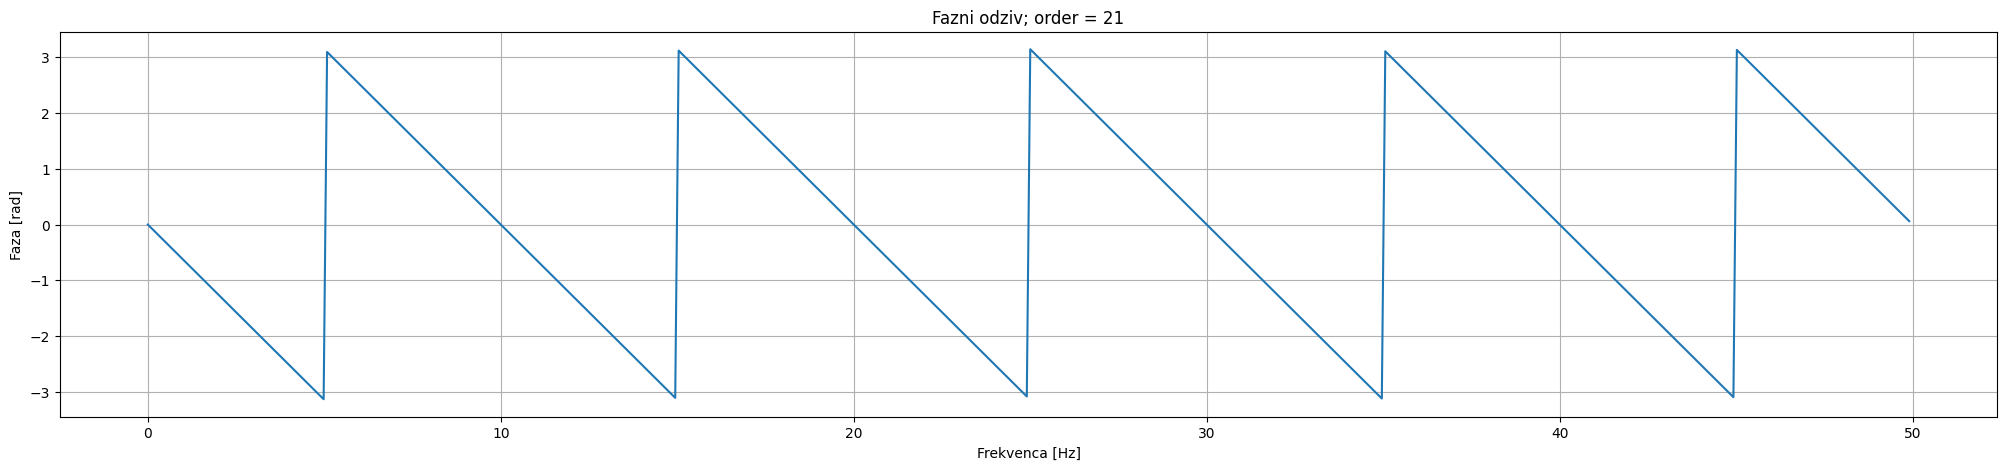

In [40]:
fo = 21
# taps -> filter weight used to multiply the input signals; impulse response
taps = signal.firls(fo, fc, am)

# Frequency response
# w = angular frequency [0, pi]
w, h = signal.freqz(taps)
fr = w * (Fs/2) / np.pi

fig, ax1 = plt.subplots(figsize=(25, 5))
plt.title(f'Frekvenčni odziv; order = {fo}')
ax1.plot(fr, 20 * np.log10(np.abs(h)))
ax1.set_ylabel('Ojačanje [dB]')
ax1.set_xlabel('Frekvenca [Hz]')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(fc * (Fs/2), am, color='r')
ax2.set_ylabel('Magnituda')
plt.show()

# Fazni odziv
plt.figure(figsize=(25, 5))
plt.plot(fr, np.angle(h))
plt.title(f'Fazni odziv; order = {fo}')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.grid(True)
plt.show()

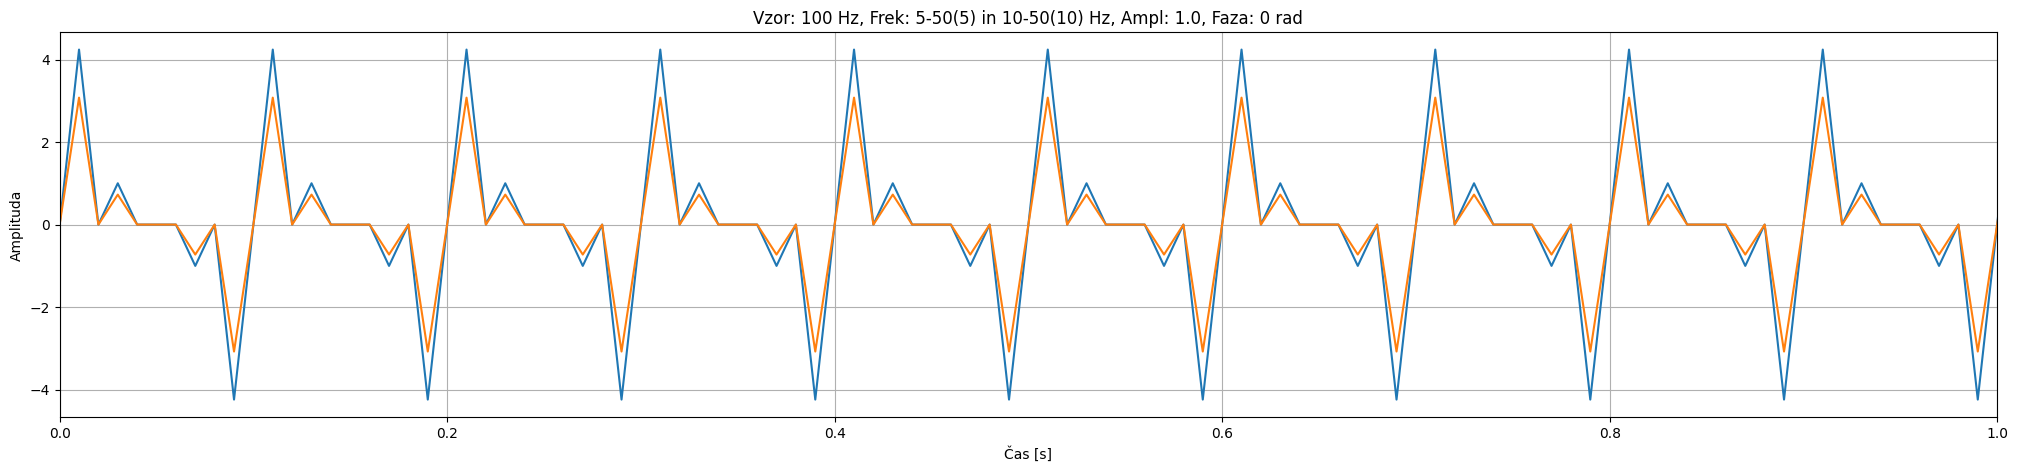

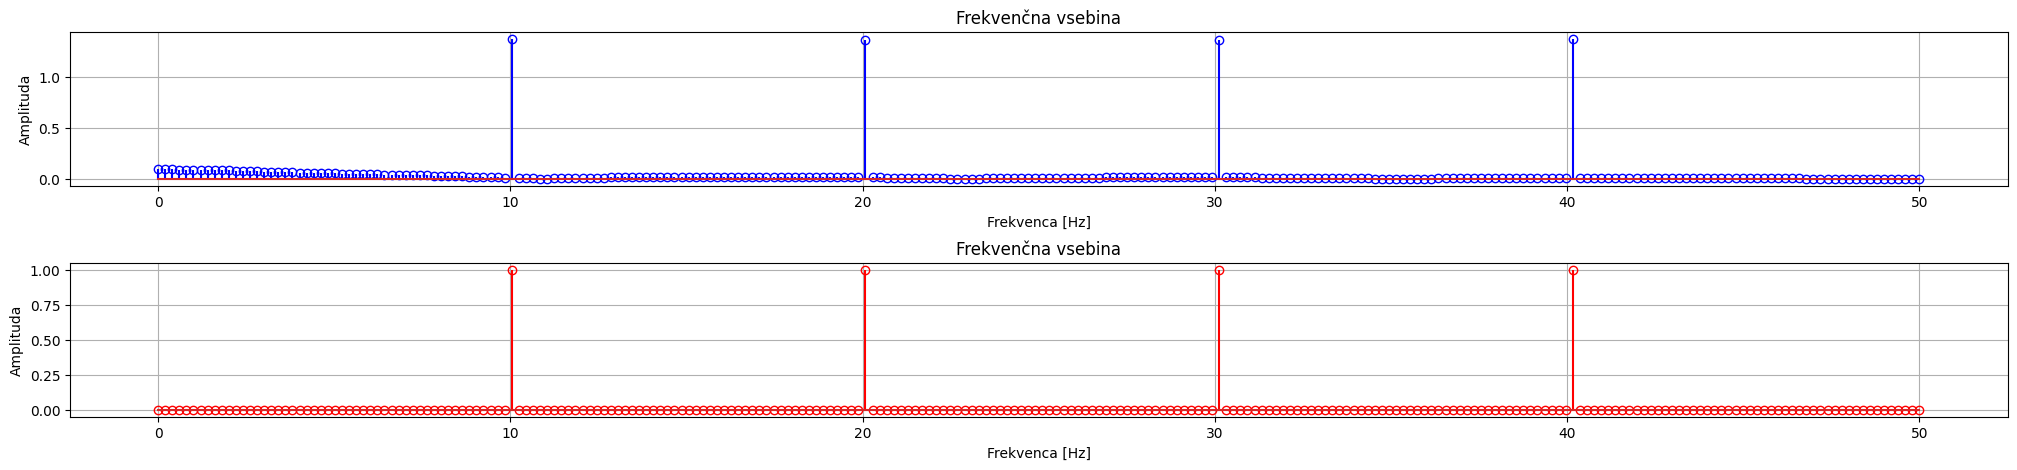

In [49]:
y5_fil = signal.filtfilt(taps, 1.0, y10)

plt.figure(figsize=(25, 5))
plt.plot(t, y5_fil)
plt.plot(t, y10)
plt.title(f'Vzor: {Fs} Hz, Frek: 5-50(5) in 10-50(10) Hz, Ampl: {A1}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.xlim([0, 1])
plt.grid(True)
plt.show()

plt.figure(figsize=(25, 5))
# FFT
Y5_fil = np.fft.fft(y5_fil)
Y10 = np.fft.fft(y10)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl5_fil = 2*abs(Y5_fil[:N//2])
ampl10 = 2*abs(Y10[:N//2])

plt.subplot(2,1,1)
markerline, stemlines, baseline = plt.stem(x, ampl5_fil/N, 'b')
markerline.set_markerfacecolor('none')
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.subplot(2,1,2)
markerline, stemlines, baseline = plt.stem(x, ampl10/N, 'r')
markerline.set_markerfacecolor('none')
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()


### Ugotovitve
- Filter mora biti visokega reda, da zadosti karakteristikam
- Red raste obratno sorazmerno z velikostjo prehodnega območja
    - **bolj strm/oster kot je filter večji red potrebujemo**
- Večji red pomeni počasnejše izvajanje